In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Weddell_Extent = pd.read_excel(filepath, sheet_name='Weddell-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/SH/Bi_LSTM_Extent/')
import Function as fp

In [4]:
fp.month_mapping(Weddell_Extent)
fp.date_time(Weddell_Extent)

,Extent,Date
0,2136510.859,1979-01-01
1,1243495.891,1979-02-01
2,1699053.449,1979-03-01
3,2617442.085,1979-04-01
4,3852934.206,1979-05-01
...,...,...
533,3668127.143,2023-06-01
534,4805519.784,2023-07-01
535,5524445.234,2023-08-01
536,6006669.861,2023-09-01


In [5]:
scaler = MinMaxScaler()
Weddell_Extent['Extent'] = scaler.fit_transform(Weddell_Extent['Extent'].values.reshape(-1, 1))

In [6]:
extent = Weddell_Extent['Extent']
W_S=12
X,y = fp.df_to_X_y(extent, W_S)
X.shape, y.shape

((526, 12, 1), (526,))

In [7]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [8]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [9]:
cp = ModelCheckpoint('Weddell_model/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [10]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
48/53 [==========================>...] - ETA: 0s - loss: 0.2957 - root_mean_squared_error: 0.5438

INFO:tensorflow:Assets written to: Weddell_model\assets


INFO:tensorflow:Assets written to: Weddell_model\assets


53/53 [==============================] - 9s 106ms/step - loss: 0.2883 - root_mean_squared_error: 0.5369 - val_loss: 0.2738 - val_root_mean_squared_error: 0.5232
Epoch 2/50
48/53 [==========================>...] - ETA: 0s - loss: 0.2268 - root_mean_squared_error: 0.4763

INFO:tensorflow:Assets written to: Weddell_model\assets


INFO:tensorflow:Assets written to: Weddell_model\assets


53/53 [==============================] - 5s 88ms/step - loss: 0.2197 - root_mean_squared_error: 0.4687 - val_loss: 0.2310 - val_root_mean_squared_error: 0.4807
Epoch 3/50
48/53 [==========================>...] - ETA: 0s - loss: 0.1800 - root_mean_squared_error: 0.4242

INFO:tensorflow:Assets written to: Weddell_model\assets


INFO:tensorflow:Assets written to: Weddell_model\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.1799 - root_mean_squared_error: 0.4242 - val_loss: 0.1899 - val_root_mean_squared_error: 0.4357
Epoch 4/50
47/53 [=========================>....] - ETA: 0s - loss: 0.1490 - root_mean_squared_error: 0.3860

INFO:tensorflow:Assets written to: Weddell_model\assets


INFO:tensorflow:Assets written to: Weddell_model\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.1461 - root_mean_squared_error: 0.3822 - val_loss: 0.1548 - val_root_mean_squared_error: 0.3935
Epoch 5/50
50/53 [===========================>..] - ETA: 0s - loss: 0.1213 - root_mean_squared_error: 0.3484

INFO:tensorflow:Assets written to: Weddell_model\assets


INFO:tensorflow:Assets written to: Weddell_model\assets


53/53 [==============================] - 4s 83ms/step - loss: 0.1194 - root_mean_squared_error: 0.3455 - val_loss: 0.1225 - val_root_mean_squared_error: 0.3500
Epoch 6/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0934 - root_mean_squared_error: 0.3055

INFO:tensorflow:Assets written to: Weddell_model\assets


INFO:tensorflow:Assets written to: Weddell_model\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0923 - root_mean_squared_error: 0.3038 - val_loss: 0.1029 - val_root_mean_squared_error: 0.3207
Epoch 7/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0708 - root_mean_squared_error: 0.2660

INFO:tensorflow:Assets written to: Weddell_model\assets


INFO:tensorflow:Assets written to: Weddell_model\assets


53/53 [==============================] - 5s 91ms/step - loss: 0.0706 - root_mean_squared_error: 0.2657 - val_loss: 0.0787 - val_root_mean_squared_error: 0.2806
Epoch 8/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0546 - root_mean_squared_error: 0.2337

INFO:tensorflow:Assets written to: Weddell_model\assets


INFO:tensorflow:Assets written to: Weddell_model\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0521 - root_mean_squared_error: 0.2282 - val_loss: 0.0595 - val_root_mean_squared_error: 0.2438
Epoch 9/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0423 - root_mean_squared_error: 0.2056

INFO:tensorflow:Assets written to: Weddell_model\assets


INFO:tensorflow:Assets written to: Weddell_model\assets


53/53 [==============================] - 4s 86ms/step - loss: 0.0420 - root_mean_squared_error: 0.2050 - val_loss: 0.0444 - val_root_mean_squared_error: 0.2106
Epoch 10/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0314 - root_mean_squared_error: 0.1772

INFO:tensorflow:Assets written to: Weddell_model\assets


INFO:tensorflow:Assets written to: Weddell_model\assets


53/53 [==============================] - 5s 91ms/step - loss: 0.0332 - root_mean_squared_error: 0.1823 - val_loss: 0.0302 - val_root_mean_squared_error: 0.1738
Epoch 11/50
52/53 [============================>.] - ETA: 0s - loss: 0.0250 - root_mean_squared_error: 0.1580

INFO:tensorflow:Assets written to: Weddell_model\assets


INFO:tensorflow:Assets written to: Weddell_model\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0249 - root_mean_squared_error: 0.1578 - val_loss: 0.0234 - val_root_mean_squared_error: 0.1529
Epoch 12/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0225 - root_mean_squared_error: 0.1499

INFO:tensorflow:Assets written to: Weddell_model\assets


INFO:tensorflow:Assets written to: Weddell_model\assets


53/53 [==============================] - 5s 90ms/step - loss: 0.0230 - root_mean_squared_error: 0.1516 - val_loss: 0.0139 - val_root_mean_squared_error: 0.1180
Epoch 13/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0148 - root_mean_squared_error: 0.1215 - val_loss: 0.0153 - val_root_mean_squared_error: 0.1238
Epoch 14/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0171 - root_mean_squared_error: 0.1307

INFO:tensorflow:Assets written to: Weddell_model\assets


INFO:tensorflow:Assets written to: Weddell_model\assets


53/53 [==============================] - 4s 83ms/step - loss: 0.0171 - root_mean_squared_error: 0.1308 - val_loss: 0.0059 - val_root_mean_squared_error: 0.0766
Epoch 15/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0125 - root_mean_squared_error: 0.1119

INFO:tensorflow:Assets written to: Weddell_model\assets


INFO:tensorflow:Assets written to: Weddell_model\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0131 - root_mean_squared_error: 0.1146 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0678
Epoch 16/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0133 - root_mean_squared_error: 0.1152

INFO:tensorflow:Assets written to: Weddell_model\assets


INFO:tensorflow:Assets written to: Weddell_model\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.0120 - root_mean_squared_error: 0.1094 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0605
Epoch 17/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0103 - root_mean_squared_error: 0.1014 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0620
Epoch 18/50
52/53 [============================>.] - ETA: 0s - loss: 0.0141 - root_mean_squared_error: 0.1189

INFO:tensorflow:Assets written to: Weddell_model\assets


INFO:tensorflow:Assets written to: Weddell_model\assets


53/53 [==============================] - 4s 83ms/step - loss: 0.0140 - root_mean_squared_error: 0.1184 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0549
Epoch 19/50
52/53 [============================>.] - ETA: 0s - loss: 0.0111 - root_mean_squared_error: 0.1052

INFO:tensorflow:Assets written to: Weddell_model\assets


INFO:tensorflow:Assets written to: Weddell_model\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0117 - root_mean_squared_error: 0.1081 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0516
Epoch 20/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0125 - root_mean_squared_error: 0.1117 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0581
Epoch 21/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0091 - root_mean_squared_error: 0.0952 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0658
Epoch 22/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0119 - root_mean_squared_error: 0.1091 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0709
Epoch 23/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0160 - root_mean_squared_error: 0.1266 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0560
Epoch 24/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0128 - root_mean_squared_error: 0.1130

INFO:tensorflow:Assets written to: Weddell_model\assets


INFO:tensorflow:Assets written to: Weddell_model\assets


53/53 [==============================] - 5s 93ms/step - loss: 0.0127 - root_mean_squared_error: 0.1128 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0482
Epoch 25/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0123 - root_mean_squared_error: 0.1107

INFO:tensorflow:Assets written to: Weddell_model\assets


INFO:tensorflow:Assets written to: Weddell_model\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0120 - root_mean_squared_error: 0.1097 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0472
Epoch 26/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0088 - root_mean_squared_error: 0.0936 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0584
Epoch 27/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0127 - root_mean_squared_error: 0.1126 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0499
Epoch 28/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0096 - root_mean_squared_error: 0.0978 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0715
Epoch 29/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0149 - root_mean_squared_error: 0.1222 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0687
Epoch 30/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0124 - root_mean_squared_error: 0.1111 - val_loss: 0.0023 - val_root_mean_squared

INFO:tensorflow:Assets written to: Weddell_model\assets


INFO:tensorflow:Assets written to: Weddell_model\assets


53/53 [==============================] - 5s 87ms/step - loss: 0.0129 - root_mean_squared_error: 0.1137 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0467
Epoch 35/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0092 - root_mean_squared_error: 0.0962 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0629
Epoch 36/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0109 - root_mean_squared_error: 0.1044 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0536
Epoch 37/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0178 - root_mean_squared_error: 0.1335

INFO:tensorflow:Assets written to: Weddell_model\assets


INFO:tensorflow:Assets written to: Weddell_model\assets


53/53 [==============================] - 5s 98ms/step - loss: 0.0179 - root_mean_squared_error: 0.1338 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0453
Epoch 38/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0108 - root_mean_squared_error: 0.1039 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0712
Epoch 39/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0113 - root_mean_squared_error: 0.1062 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0664
Epoch 40/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0118 - root_mean_squared_error: 0.1088 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0494
Epoch 41/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0125 - root_mean_squared_error: 0.1117

INFO:tensorflow:Assets written to: Weddell_model\assets


INFO:tensorflow:Assets written to: Weddell_model\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0133 - root_mean_squared_error: 0.1152 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0435
Epoch 42/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0107 - root_mean_squared_error: 0.1035 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0695
Epoch 43/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0146 - root_mean_squared_error: 0.1210 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0756
Epoch 44/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0105 - root_mean_squared_error: 0.1023 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0674
Epoch 45/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0110 - root_mean_squared_error: 0.1050 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0488
Epoch 46/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0119 - root_mean_squared_error: 0.1091

INFO:tensorflow:Assets written to: Weddell_model\assets


INFO:tensorflow:Assets written to: Weddell_model\assets


53/53 [==============================] - 5s 90ms/step - loss: 0.0113 - root_mean_squared_error: 0.1064 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0432
Epoch 47/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0108 - root_mean_squared_error: 0.1040 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0510
Epoch 48/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0099 - root_mean_squared_error: 0.0997

INFO:tensorflow:Assets written to: Weddell_model\assets


INFO:tensorflow:Assets written to: Weddell_model\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.0105 - root_mean_squared_error: 0.1026 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0430
Epoch 49/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0111 - root_mean_squared_error: 0.1055 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0434
Epoch 50/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1125 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0667


In [11]:
time = (etime - stime)/60
print(f'{time} minutes')

2.0657208879788715 minutes


In [12]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

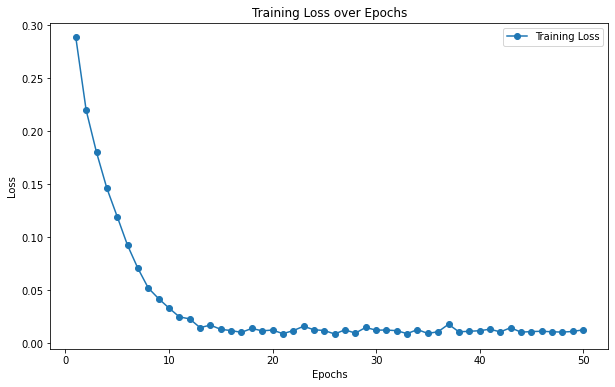

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

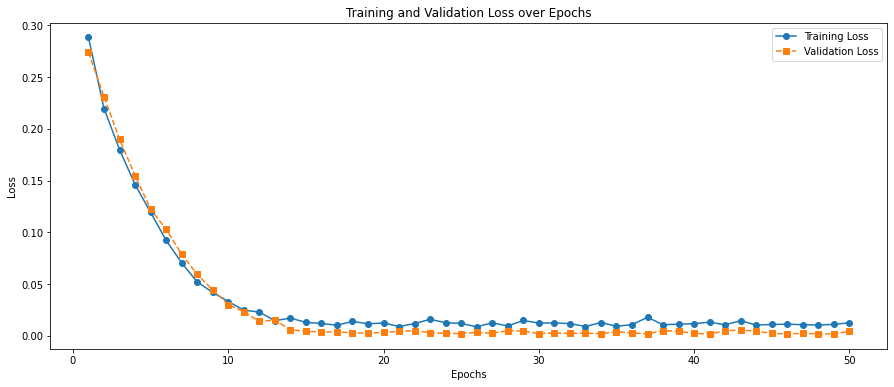

In [14]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [9]:
from tensorflow.keras.models import load_model
model1 = load_model('Weddell_model/')

In [10]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 6ms/step


In [11]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.03081997947738891
MAE : 0.024267150585478528


In [12]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [13]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,2.977057e+06,2787848.748
1,4.171460e+06,4544849.638
2,5.755292e+06,5882741.038
3,6.692865e+06,6574288.749
4,6.914758e+06,6669726.076
5,6.627302e+06,6516136.854
6,5.789308e+06,5902163.675
7,4.142900e+06,3498103.449
8,1.424482e+06,1633675.726
9,1.237162e+06,1292668.399


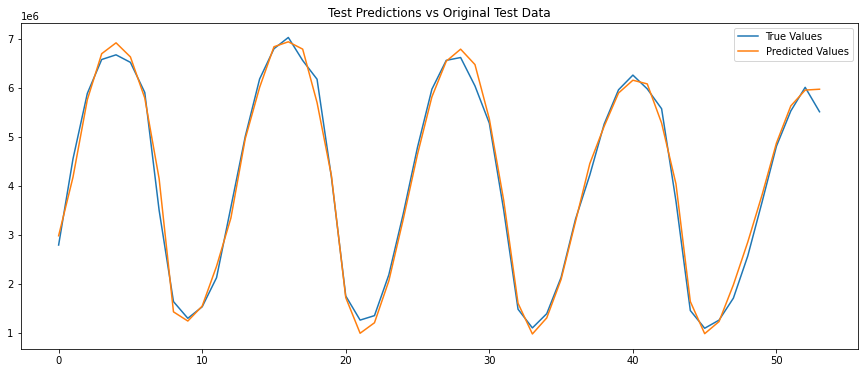

In [14]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [15]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 3ms/step


In [18]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

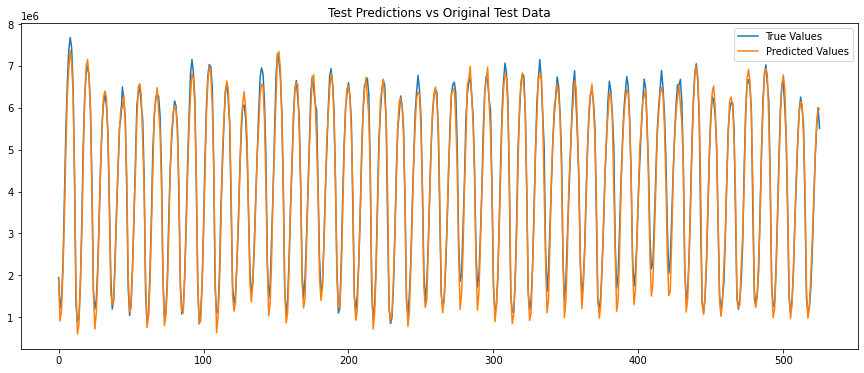

In [19]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()